In [ ]:
#@title Install & import libraries
!pip install pandas numpy matplotlib seaborn plotly openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

pd.set_option("display.max_columns", 200)


In [ ]:
#@title Upload Excel file
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
print("Uploaded:", file_name)


Saving Study Case DA.xlsx to Study Case DA.xlsx
Uploaded: Study Case DA.xlsx


In [ ]:
#@title Load all sheets
xls = pd.ExcelFile(file_name)
sheets = xls.sheet_names
sheets


['Talent Variable (TV) & Talent G',
 'dim_companies',
 'dim_areas',
 'dim_positions',
 'dim_departments',
 'dim_divisions',
 'dim_directorates',
 'dim_grades',
 'dim_education',
 'dim_majors',
 'dim_competency_pillars',
 'employees',
 'profiles_psych',
 'papi_scores',
 'strengths',
 'performance_yearly',
 'competencies_yearly']

In [ ]:
dfs = {sheet: pd.read_excel(xls, sheet) for sheet in sheets}
dfs.keys()


dict_keys(['Talent Variable (TV) & Talent G', 'dim_companies', 'dim_areas', 'dim_positions', 'dim_departments', 'dim_divisions', 'dim_directorates', 'dim_grades', 'dim_education', 'dim_majors', 'dim_competency_pillars', 'employees', 'profiles_psych', 'papi_scores', 'strengths', 'performance_yearly', 'competencies_yearly'])

In [ ]:
dfs["employees"].head()


,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34




---



In [ ]:
#@title Identifikasi High Performers (Rating = 5)

df_perf = dfs["performance_yearly"]
df_emps = dfs["employees"]

# Filter karyawan dengan rating 5
df_hp = df_perf[df_perf["rating"] == 5]

print("Jumlah High Performers:", len(df_hp))
df_hp.head()


Jumlah High Performers: 881


,employee_id,rating,year
8,EMP100008,5.0,2021
21,EMP100021,5.0,2021
43,EMP100043,5.0,2021
49,EMP100049,5.0,2021
53,EMP100053,5.0,2021


In [ ]:
#@title Merge High Performer Dengan Data Employees (Profil Lengkap)

df_hp_detail = df_hp.merge(df_emps, on="employee_id", how="left")
df_hp_detail.head()


,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100008,5.0,2021,Gita Permadi,189647,2,4,3,1,5,1,1,4,1,40
1,EMP100021,5.0,2021,Oka Candra Kurniawan,828497,3,3,1,4,3,2,3,2,6,81
2,EMP100043,5.0,2021,Nugroho Indrawan,123837,2,2,3,4,2,2,1,1,3,40
3,EMP100049,5.0,2021,Rizki Halim Siregar,453636,1,4,5,1,1,1,3,4,6,35
4,EMP100053,5.0,2021,Anisa Pamungkas,770602,1,3,1,3,3,1,3,3,5,52


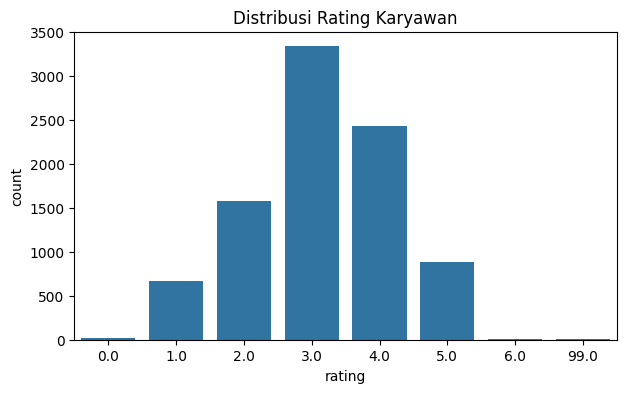

In [ ]:
#@title Distribusi Rating Karyawan

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,4))
sns.countplot(data=df_perf, x="rating")
plt.title("Distribusi Rating Karyawan")
plt.show()


In [ ]:
#@title Ambil Data Kompetensi Tahun Terbaru

df_comp = dfs["competencies_yearly"]

latest_year = df_comp["year"].max()
print("Tahun kompetensi terbaru:", latest_year)

df_comp_latest = df_comp[df_comp["year"] == latest_year]
df_comp_latest.head()


Tahun kompetensi terbaru: 2025


,employee_id,score,pillar_code,year
8040,EMP100000,3.0,GDR,2025
8041,EMP100001,2.0,GDR,2025
8042,EMP100002,3.0,GDR,2025
8043,EMP100003,4.0,GDR,2025
8044,EMP100004,4.0,GDR,2025


In [ ]:
#@title Tambahkan Label High Performer Ke Data Kompetensi

df_comp_latest["is_hp"] = df_comp_latest["employee_id"].isin(df_hp["employee_id"])
df_comp_latest.head()


/tmp/ipython-input-3335916899.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_comp_latest["is_hp"] = df_comp_latest["employee_id"].isin(df_hp["employee_id"])


,employee_id,score,pillar_code,year,is_hp
8040,EMP100000,3.0,GDR,2025,False
8041,EMP100001,2.0,GDR,2025,False
8042,EMP100002,3.0,GDR,2025,False
8043,EMP100003,4.0,GDR,2025,False
8044,EMP100004,4.0,GDR,2025,False


In [ ]:
#@title Pivot Table Kompetensi (High vs Non-High Performer)

pivot_comp = df_comp_latest.pivot_table(
    index="pillar_code",
    columns="is_hp",
    values="score",
    aggfunc="mean"
)

pivot_comp.columns = ["Non-High Performer", "High Performer"]
pivot_comp


,Non-High Performer,High Performer
pillar_code,,
CEX,3.014419,3.234860
CSI,3.361135,3.434718
FTC,3.053435,3.685294
GDR,3.159798,3.400000
IDS,3.241880,3.281752
LIE,3.289362,3.312966
QDD,3.118557,3.594993
SEA,2.929721,3.460294
STO,3.098107,3.703264


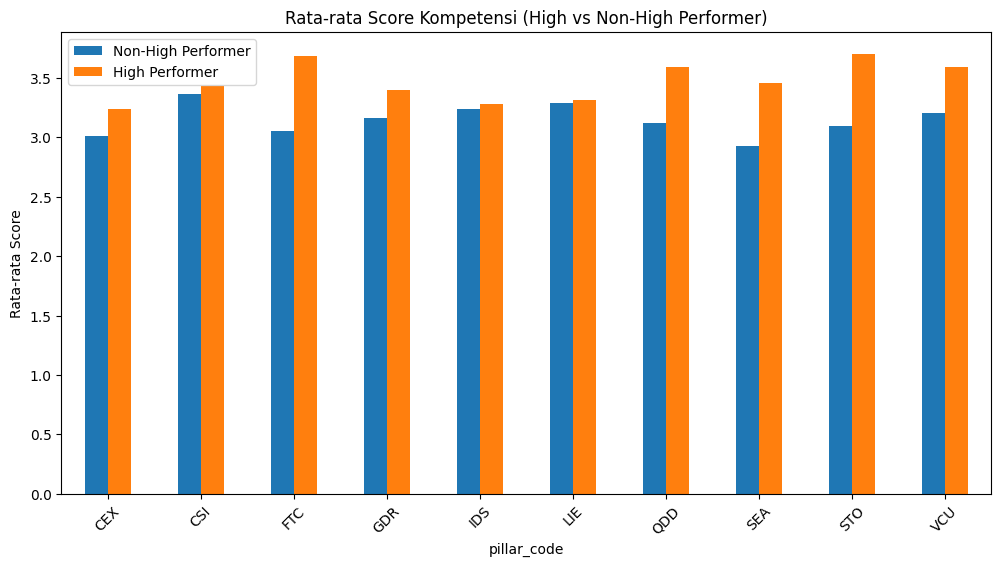

In [ ]:
#@title Visualisasi Perbedaan Kompetensi (Barplot)

pivot_comp.plot(kind="bar", figsize=(12,6))
plt.title("Rata-rata Score Kompetensi (High vs Non-High Performer)")
plt.xticks(rotation=45)
plt.ylabel("Rata-rata Score")
plt.show()


----

In [ ]:
#@title Analisis PAPI: High vs Non-High Performer

df_papi = dfs["papi_scores"]

# Tambah label high performer
df_papi["is_hp"] = df_papi["employee_id"].isin(df_hp["employee_id"])

# Pivot PAPI
pivot_papi = df_papi.pivot_table(
    index="scale_code",
    columns="is_hp",
    values="score",
    aggfunc="mean"
)

pivot_papi.columns = ["Non-High Performer", "High Performer"]
pivot_papi


,Non-High Performer,High Performer
scale_code,,
Papi_A,5.070940,4.962099
Papi_B,4.931897,4.895044
Papi_C,4.851727,4.876106
Papi_D,5.015371,4.912851
Papi_E,5.051089,5.092262
Papi_F,5.053985,5.062687
Papi_G,4.957447,4.886765
Papi_I,5.084543,4.952522
Papi_K,5.059880,4.937973


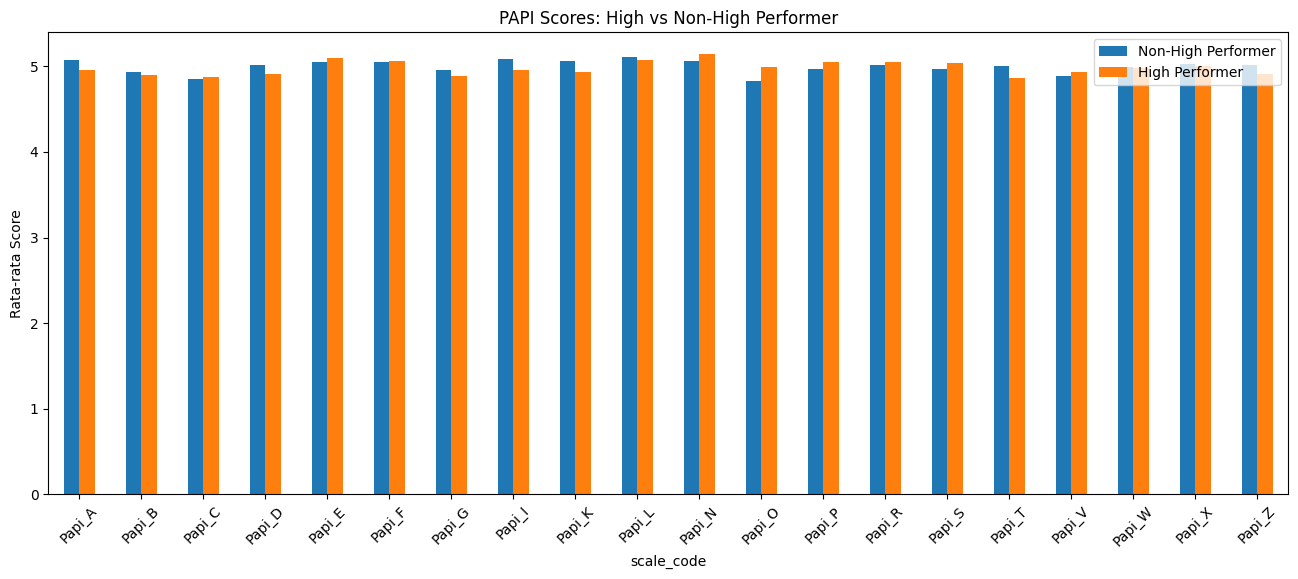

In [ ]:
#@title Visualisasi PAPI (High vs Non-High)

pivot_papi.plot(kind="bar", figsize=(16,6))
plt.title("PAPI Scores: High vs Non-High Performer")
plt.xticks(rotation=45)
plt.ylabel("Rata-rata Score")
plt.show()




---



In [ ]:
#@title Cek Semua Kolom di profiles_psych
df_psy = dfs["profiles_psych"]
df_psy.columns


Index(['employee_id', 'pauli', 'faxtor', 'disc', 'disc_word', 'mbti', 'iq',
       'gtq', 'tiki', 'is_hp'],
      dtype='object')

In [ ]:
#@title Analisis Cognitive (IQ, GTQ, TIKI, Faxtor, Pauli)

df_psy = dfs["profiles_psych"]

# label high performer
df_psy["is_hp"] = df_psy["employee_id"].isin(df_hp["employee_id"])

# kolom cognitive (versi dataset ini)
cognitive_cols = ["iq", "gtq", "tiki", "faxtor", "pauli"]

df_cog = df_psy[["employee_id", "is_hp"] + cognitive_cols]

# hitung mean
pivot_cog = df_cog.groupby("is_hp")[cognitive_cols].mean().T
pivot_cog.columns = ["Non-High Performer", "High Performer"]

pivot_cog


,Non-High Performer,High Performer
iq,109.725904,109.134409
gtq,27.186155,27.954023
tiki,5.453333,5.529252
faxtor,60.315294,60.227211
pauli,59.423529,60.929252


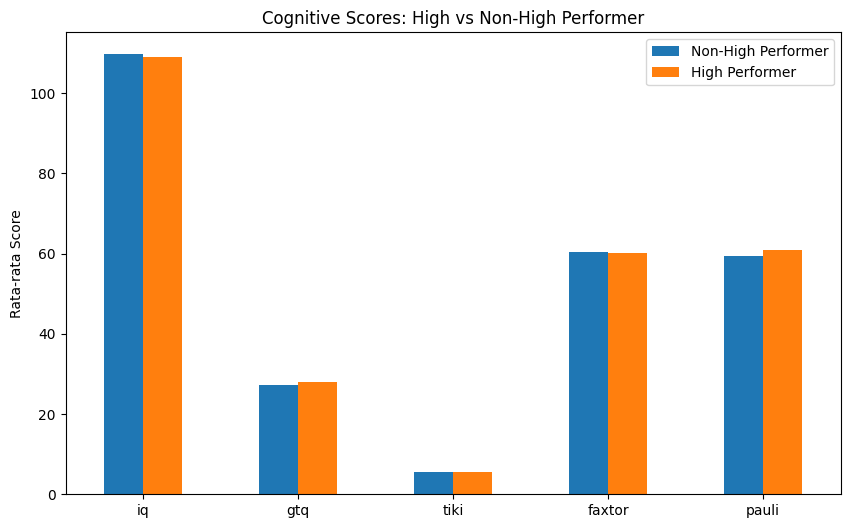

In [ ]:
#@title Visualisasi Cognitive (Barplot Per Variabel)

pivot_cog.plot(kind="bar", figsize=(10,6))
plt.title("Cognitive Scores: High vs Non-High Performer")
plt.xticks(rotation=0)
plt.ylabel("Rata-rata Score")
plt.show()


In [ ]:
#@title Analisis MBTI (High vs Non-High Performer)

df_psy = dfs["profiles_psych"].copy()

# Bersihkan MBTI (uppercase, remove spaces)
df_psy["mbti_clean"] = df_psy["mbti"].str.upper().str.replace(" ", "")

# Label HP
df_psy["is_hp"] = df_psy["employee_id"].isin(df_hp["employee_id"])

# Pivot MBTI
pivot_mbti = df_psy.groupby(["mbti_clean", "is_hp"]).size().unstack(fill_value=0)

pivot_mbti.columns = ["Non-High Performer", "High Performer"]
pivot_mbti


,Non-High Performer,High Performer
mbti_clean,,
ENFJ,92,38
ENFP,88,62
ENTJ,75,43
ENTP,73,45
ESFJ,76,42
ESFP,69,40
ESTJ,75,30
ESTP,57,39
INFJ,69,35


In [ ]:
#@title Analisis DISC (High vs Non-High Performer)

df_psy["disc_clean"] = df_psy["disc"].str.upper().str.strip()

pivot_disc = df_psy.groupby(["disc_clean", "is_hp"]).size().unstack(fill_value=0)
pivot_disc.columns = ["Non-High Performer", "High Performer"]

pivot_disc


,Non-High Performer,High Performer
disc_clean,,
CD,114,55
CI,96,77
CS,97,62
DC,94,69
DI,99,55
DS,90,50
IC,101,46
ID,90,53
IS,77,50


In [ ]:
#@title Analisis Strengths (CliftonStrengths): High vs Non-High Performer

df_strength = dfs["strengths"].copy()
df_strength["is_hp"] = df_strength["employee_id"].isin(df_hp["employee_id"])

# Count theme frequency
pivot_strength = df_strength.groupby(["theme", "is_hp"]).size().unstack(fill_value=0)
pivot_strength.columns = ["Non-High Performer", "High Performer"]

pivot_strength.sort_values("High Performer", ascending=False).head(20)


,Non-High Performer,High Performer
theme,,
Self-Assurance,500,308
Individualization,456,302
Deliberative,484,296
Context,480,294
Positivity,487,293
Belief,519,292
Intellection,483,291
Empathy,486,287
Communication,480,286


-----

In [ ]:
#@title Save all sheets in the Excel file as CSV files

import pandas as pd
import os

excel_path = "/content/Study Case DA.xlsx"  # ganti sesuai path kamu

xls = pd.ExcelFile(excel_path)
sheets = xls.sheet_names

output_dir = "/content/csv_output/"
os.makedirs(output_dir, exist_ok=True)

for sheet in sheets:
    df = pd.read_excel(xls, sheet)
    filename = f"{sheet}.csv".replace(" ", "_")
    csv_path = os.path.join(output_dir, filename)
    df.to_csv(csv_path, index=False)
    print(f"Saved: {csv_path}")

print("\nAll sheets exported to CSV!")


Saved: /content/csv_output/Talent_Variable_(TV)_&_Talent_G.csv
Saved: /content/csv_output/dim_companies.csv
Saved: /content/csv_output/dim_areas.csv
Saved: /content/csv_output/dim_positions.csv
Saved: /content/csv_output/dim_departments.csv
Saved: /content/csv_output/dim_divisions.csv
Saved: /content/csv_output/dim_directorates.csv
Saved: /content/csv_output/dim_grades.csv
Saved: /content/csv_output/dim_education.csv
Saved: /content/csv_output/dim_majors.csv
Saved: /content/csv_output/dim_competency_pillars.csv
Saved: /content/csv_output/employees.csv
Saved: /content/csv_output/profiles_psych.csv
Saved: /content/csv_output/papi_scores.csv
Saved: /content/csv_output/strengths.csv
Saved: /content/csv_output/performance_yearly.csv
Saved: /content/csv_output/competencies_yearly.csv

All sheets exported to CSV!


In [ ]:
#@title Download CSV files from Google Colab

from google.colab import files
import os

csv_folder = "/content/csv_output/"

for fname in os.listdir(csv_folder):
    if fname.endswith(".csv"):
        files.download(os.path.join(csv_folder, fname))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#@title 🔧 FIX ALL CSV — convert floats to integers for Supabase Upload

import pandas as pd
import os

base = "/content/csv_output/"

def fix_int_columns(filename, int_cols):
    path = os.path.join(base, filename)
    df = pd.read_csv(path)

    for col in int_cols:
        if col in df.columns:
            df[col] = df[col].fillna(0).astype(int)

    fixed_name = filename.replace(".csv", "_fixed.csv")
    df.to_csv(os.path.join(base, fixed_name), index=False)
    print(f"[OK] {fixed_name} created")

# 1. competencies_yearly
fix_int_columns(
    "competencies_yearly.csv",
    ["score", "year"]
)

# 2. papi_scores
fix_int_columns(
    "papi_scores.csv",
    ["score"]
)

# 3. performance_yearly
fix_int_columns(
    "performance_yearly.csv",
    ["year", "rating"]
)

# 4. profiles_psych
fix_int_columns(
    "profiles_psych.csv",
    ["iq", "gtq", "tiki", "faxtor", "pauli"]
)

print("\nAll FIXED CSV files generated successfully.")


[OK] competencies_yearly_fixed.csv created
[OK] papi_scores_fixed.csv created
[OK] performance_yearly_fixed.csv created
[OK] profiles_psych_fixed.csv created

All FIXED CSV files generated successfully.


In [ ]:
#@title 📥 Download all *_fixed.csv files

from google.colab import files
import os

folder = "/content/csv_output/"
for f in os.listdir(folder):
    if f.endswith("_fixed.csv"):
        print("Downloading:", f)
        files.download(os.path.join(folder, f))


Downloading: performance_yearly_fixed.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloading: competencies_yearly_fixed.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloading: profiles_psych_fixed.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Downloading: papi_scores_fixed.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>